In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', 50)
from nltk import FreqDist
import nltk
import pickle
import google_conf
import matplotlib.pyplot as plt
import os

In [2]:
# global parameters for plots
plt.style.use("seaborn-white")
plt.rcParams['figure.dpi'] = 300
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams['font.size'] = 8

def save_figure(fig, fig_name):
    #each figure to be saved in four different versions
    fig.savefig("../figures/" + fig_name + ".tiff")
    fig.savefig("../figures/" + fig_name + ".png")

In [3]:
# point out to your google service account and a google sheet URL to which you wish to send your data
# if you dont have access to the linked gsheet file, skip this step
theos_data = google_conf.setup(sheet_url="https://docs.google.com/spreadsheets/d/19gfECdrg5rDiU2PhNYL1nKifeKzemCfYtYrAHQX5vXE/edit?usp=sharing", service_account_path="../../../ServiceAccountsKey.json")

In [4]:
# load LAGT (v3.0) dataset locally or download it directly from Zenodo
try:
    local_paths = !find ~/notebooks -name "LAGT_v3-0.parquet"
    print(local_paths)
    LAGT = pd.read_parquet(local_paths[0])
except:
    pass
    LAGT = pd.read_parquet("https://zenodo.org/records/10684841/files/LAGT_v3-0.parquet?download=1")
    os.mkdir("../data/large_data/")
    LAGT.to_parquet("../data/large_data/LAGT_v3-0.parquet")

['/home/jupyter-vojta/notebooks/LAGT/data/large_files/LAGT_v3-0.parquet', '/home/jupyter-vojta/notebooks/theos/data/large_data/LAGT_v3-0.parquet']


# Short demonstration of the LAGT dataset...

In [5]:
LAGT.head(5)

,author_id,doc_id,filename,author,title,string,wordcount,source,lemmatized_sentences,lemmata_source,tlg_date,not_before,not_after,date_uncertain,tlg_epithet,provenience,lemmatacount
2,ogl0001,ogl0001.ogl001,ogl0001.ogl001.1st1K-grc1.xml,Pinytus,De Epistola Pinyti ad Dionysium,"FRAGMENTUM BEATI PINYTI, CNOSSI IN CRETA EPISC...",180,1Kgr,"[[Πινυτός, ἀντιγράφω, θαυμάζω, ἀποδέχω, Διονύσ...",grecy,None,101.0,200.0,None,[],christian,34
8,tlg0005,tlg0005.tlg003,tlg0005.tlg003.1st1K-grc1.xml,Theocritus,Syrinx,Οὐδενὸς εὐνάτειρα Μακροπτολέμοιο δὲ μάτηρ μαί...,77,1Kgr,"[[οὐδενός, εὐνητήρ], [μακροπτολέμοιο, μήτηρ, μ...",grecy,4-3 B.C.,-400.0,-201.0,False,[Bucolici],pagan,61
9,tlg0006,tlg0006.tlg020,tlg0006.tlg020.1st1K-grc1.xml,Euripides,Fragmenta,ποίαν σε φῶμεν γαῖαν ἐκλελοιπότα πόλει ξενοῦσθ...,17708,1Kgr,"[[φημί, γῆ, ἐκλείπω, πόλις, ξενοῦσθαι], [πάτρα...",grecy,5 B.C.,-500.0,-401.0,False,[Tragici],pagan,10277
10,tlg0007,tlg0007.tlg146,tlg0007.tlg146.1st1K-grc1.xml,Plutarch,Παροιμίαι αἷς Ἀλεξανδρεῖς ἐχρῶντο,Οἴκοι τὰ Μιλήσια: ἐπὶ τῶν ὅποι μὴ προςήκει τὴν...,2685,1Kgr,"[[Μιλήσιος], [προςήκω, τρυφή, ἐπιδείκνυμι], [Ἀ...",grecy,A.D. 1-2,1.0,200.0,False,"[Biographi, Philosophici/-ae]",pagan,1488
11,tlg0007,tlg0007.tlg147,tlg0007.tlg147.1st1K-grc1.xml,Plutarch,Ἐκλογὴ περὶ τῶν ἀδυνάτων,Κατὰ πετρῶν σπείρεις. Πλίνθον πλύνεις. Δικτύῳ ...,143,1Kgr,"[[πέτρα, σπείρω], [Πλίνθος, πλύνω, Δίκτυον, ἄν...",grecy,A.D. 1-2,1.0,200.0,False,"[Biographi, Philosophici/-ae]",pagan,125


In [6]:
len(LAGT)

1710

In [7]:
LAGT["author_id"].nunique()

325

In [8]:

LAGT["wordcount"].sum()

32323612

In [9]:
LAGT[LAGT["author_id"].str.startswith("tlg0031")]

,author_id,doc_id,filename,author,title,string,wordcount,source,lemmatized_sentences,lemmata_source,tlg_date,not_before,not_after,date_uncertain,tlg_epithet,provenience,lemmatacount
1525,tlg0031a,tlg0031.tlg001,tlg0031.tlg001.perseus-grc2.xml,None,New Testament - Matthew,ΒΙΒΛΟΣ γενέσεως Ἰησοῦ Χριστοῦ υἱοῦ Δαυεὶδ υἱ...,18288,perseus,"[[βίβλος, γένεσις, Ἰησοῦς, Χριστός, υἱός, Δαυί...",morphgnt,A.D. 1,1.0,100.0,False,[],christian,8699
1526,tlg0031b,tlg0031.tlg002,tlg0031.tlg002.perseus-grc2.xml,None,New Testament - Mark,\n\n ΑΡΧΗ τοῦ εὐαγγελίου Ἰη...,11275,perseus,"[[ἀρχή, εὐαγγέλιον, Ἰησοῦς, Χριστός], [γράφω, ...",morphgnt,A.D. 1,1.0,100.0,False,[],christian,5308
1527,tlg0031luke,tlg0031.tlg003,tlg0031.tlg003.perseus-grc2.xml,Luke (the evangelist),New Testament - Luke,\n\n ΕΠΕΙΔΗΠΕΡ ΠΟΛΛΟΙ ἐπεχε...,19459,perseus,"[[πολύς, ἐπιχειρέω, ἀνατάσσομαι, διήγησις, πλη...",morphgnt,A.D. 1,1.0,100.0,False,[],christian,9194
1528,tlg0031john,tlg0031.tlg004,tlg0031.tlg004.perseus-grc2.xml,Johnannine literature,New Testament - John,"\n\n ΕΝ ΑΡΧΗ ἦν ὁ λόγος, κα...",15592,perseus,"[[ἀρχή, εἰμί, λόγος, λόγος, εἰμί, θεός, θεός, ...",morphgnt,A.D. 1,1.0,100.0,False,[],christian,6892
1529,tlg0031luke,tlg0031.tlg005,tlg0031.tlg005.perseus-grc2.xml,Luke (the evangelist),New Testament - Acts,\n τὸν μὲν πρῶτον λόγον ἐποιησάμην περὶ πάντων...,18405,perseus,"[[πρῶτος, λόγος, ποιέω, πᾶς, Θεόφιλος, ἄρχω, Ἰ...",morphgnt,A.D. 1,1.0,100.0,False,[],christian,9141
1530,tlg0031paul,tlg0031.tlg006,tlg0031.tlg006.perseus-grc2.xml,Paul of Tarsus,New Testament - Romans,\n\n ΠΑΥΛΟΣ δοῦλος Ἰησοῦ Χρ...,7107,perseus,"[[Παῦλος, δοῦλος, Χριστός, Ἰησοῦς, κλητός, ἀπό...",morphgnt,A.D. 1,1.0,100.0,False,[],christian,3265
1531,tlg0031paul,tlg0031.tlg007,tlg0031.tlg007.perseus-grc2.xml,Paul of Tarsus,New Testament - 1 Corinthians,\n\n ΠΑΥΛΟΣ κλητὸς ἀπόστολο...,6814,perseus,"[[Παῦλος, κλητός, ἀπόστολος, Χριστός, Ἰησοῦς, ...",morphgnt,A.D. 1,1.0,100.0,False,[],christian,3292
1532,tlg0031paul,tlg0031.tlg008,tlg0031.tlg008.perseus-grc2.xml,Paul of Tarsus,New Testament - 2 Corinthians,\n\n ΠΑΥΛΟΣ ἀπόστολος Χριστ...,4470,perseus,"[[Παῦλος, ἀπόστολος, Χριστός, Ἰησοῦς, θέλημα, ...",morphgnt,A.D. 1,1.0,100.0,False,[],christian,1925
1533,tlg0031paul,tlg0031.tlg009,tlg0031.tlg009.perseus-grc2.xml,Paul of Tarsus,New Testament - Galatians,"\n\n ΠΑΥΛΟΣ ἀπόστολος, οὐκ ...",2235,perseus,"[[Παῦλος, ἀπόστολος, ἄνθρωπος, ἄνθρωπος, Ἰησοῦ...",morphgnt,A.D. 1,1.0,100.0,False,[],christian,1058
1534,tlg0031pspa,tlg0031.tlg010,tlg0031.tlg010.perseus-grc2.xml,Pauline literature,New Testament - Ephesians,\n\n ΠΑΥΛΟΣ ἀπόστολος Χριστ...,2421,perseus,"[[Παῦλος, ἀπόστολος, Χριστός, Ἰησοῦς, θέλημα, ...",morphgnt,A.D. 1,1.0,100.0,False,[],christian,1126


In [10]:
# extract a list of all lemmatized words from all lemmatized sentences
wordlist = [w for sent in [sent for work in LAGT["lemmatized_sentences"] for sent in work] for w in sent]
# count all instances of the word θεός
wordlist.count("θεός")

60033

In [11]:
# filter for texts from the fifth and fourth c. BCE
len(LAGT[(LAGT["not_before"].between(-500,-301)) | (LAGT["not_before"].between(-500,-301))])

443

In [12]:
# index for aristotle's nicomachean ethics
i = LAGT[LAGT["doc_id"]=="tlg0086.tlg010"].index[0]
LAGT.loc[i]

author_id                                                         tlg0086
doc_id                                                     tlg0086.tlg010
filename                                  tlg0086.tlg010.perseus-grc1.xml
author                                                          Aristotle
title                                                  Nicomachean Ethics
string                  πᾶσα τέχνη καὶ πᾶσα μέθοδος, ὁμοίως δὲ πρᾶξίς ...
wordcount                                                           56630
source                                                            perseus
lemmatized_sentences    [[πᾶς, τέχνη, πᾶς, μέθοδος, πρᾶξις, προαίρεσις...
lemmata_source                                                      glaux
tlg_date                                                           4 B.C.
not_before                                                         -400.0
not_after                                                          -301.0
date_uncertain                        

# Explore overall vocabulary

In [13]:
sents = [sent for work in LAGT["lemmatized_sentences"] for sent in work]

In [14]:
len(sents)

2136459

In [15]:
min_freq = 10

def get_vocab(docs, min_freq=min_freq):
    words_flat = [item for sublist in docs for item in sublist]
    word_freq_tups = FreqDist(words_flat).most_common()
    vocabulary = [tup[0] for tup in word_freq_tups if tup[1] >= min_freq]
    #vocab_freqs = [len([doc for doc in docs if word in doc]) for word in vocabulary]
    return word_freq_tups, words_flat, vocabulary

In [16]:
word_freqs, words, vocabulary = get_vocab(sents)

In [17]:
pd.DataFrame(word_freqs[:20], columns=["lemma", "count"])

,lemma,count
0,οὗτος,329550
1,λέγω,239805
2,εἰμί,228068
3,αὐτός,213863
4,γίγνομαι,157466
5,ἔχω,146946
6,πολύς,121226
7,πᾶς,104593
8,φημί,99994
9,ἄλλος,96970


# Generate ngrams

In [18]:
doc_ids = LAGT["doc_id"].tolist()
len(doc_ids)

1710

In [19]:
#!mkdir ../data/large_data

In [20]:
line = 0
ids_lines = {}

f = open("../data/large_data/corpus_ngrams_bydocid_wide.txt", "w", encoding="utf-8")
for doc_id in doc_ids:
    lagt_subset = LAGT[LAGT["doc_id"]==doc_id]
    sents = [sen for work in lagt_subset["lemmatized_sentences"] for sen in work]
    sents_trigrams = [list(el) for sublist in [[ng for ng in nltk.trigrams(sent)] for sent in sents] for el in sublist]
    sents_fivegrams = [list(el) for sublist in [[ng for ng in nltk.ngrams(sent, n=5)] for sent in sents] for el in sublist]
    ngrams_data = sents + sents_fivegrams # + sents_trigrams
    ngrams_data = [" ".join(ngram) for ngram in ngrams_data]
    f.writelines("\n".join(ngrams_data)+"\n")
    if bool(ngrams_data):
        ids_lines[doc_id] = (line, line+len(ngrams_data))
        line += len(ngrams_data)
    else:
        ids_lines[doc_id] = (line, line+1)
        line += 1

In [21]:
pickle.dump(ids_lines, open("../data/ids_lines_wide.pickle", "wb"))

# Ngram example

In [22]:
# index for aristotle's nicomachean ethics
i = LAGT[LAGT["doc_id"]=="tlg0086.tlg010"].index[0]

In [23]:
i

'1736'

In [24]:
LAGT.loc[i]["string"].split("·")[0]

'πᾶσα τέχνη καὶ πᾶσα μέθοδος, ὁμοίως δὲ πρᾶξίς τε καὶ προαίρεσις, ἀγαθοῦ τινὸς ἐφίεσθαι δοκεῖ'

In [25]:
sent = LAGT.loc[i]["lemmatized_sentences"][0]
print(list(sent))

['πᾶς', 'τέχνη', 'πᾶς', 'μέθοδος', 'πρᾶξις', 'προαίρεσις', 'ἀγαθός', 'τις', 'ἐφίημι', 'δοκέω']


In [26]:
trigrams = [list(ng) for ng in nltk.trigrams(sent)]
fivegrams = [list(ng) for ng in nltk.ngrams(sent, n=5)]
ngrams_example = [list(sent)] + trigrams + fivegrams
print(ngrams_example)

[['πᾶς', 'τέχνη', 'πᾶς', 'μέθοδος', 'πρᾶξις', 'προαίρεσις', 'ἀγαθός', 'τις', 'ἐφίημι', 'δοκέω'], ['πᾶς', 'τέχνη', 'πᾶς'], ['τέχνη', 'πᾶς', 'μέθοδος'], ['πᾶς', 'μέθοδος', 'πρᾶξις'], ['μέθοδος', 'πρᾶξις', 'προαίρεσις'], ['πρᾶξις', 'προαίρεσις', 'ἀγαθός'], ['προαίρεσις', 'ἀγαθός', 'τις'], ['ἀγαθός', 'τις', 'ἐφίημι'], ['τις', 'ἐφίημι', 'δοκέω'], ['πᾶς', 'τέχνη', 'πᾶς', 'μέθοδος', 'πρᾶξις'], ['τέχνη', 'πᾶς', 'μέθοδος', 'πρᾶξις', 'προαίρεσις'], ['πᾶς', 'μέθοδος', 'πρᾶξις', 'προαίρεσις', 'ἀγαθός'], ['μέθοδος', 'πρᾶξις', 'προαίρεσις', 'ἀγαθός', 'τις'], ['πρᾶξις', 'προαίρεσις', 'ἀγαθός', 'τις', 'ἐφίημι'], ['προαίρεσις', 'ἀγαθός', 'τις', 'ἐφίημι', 'δοκέω']]


In [27]:
len(ngrams_example)

15

# Exploring subcorpora

In [28]:
periods = {
    "archaic" : (-800, -501),
    "classical" : (-500,-301),
    "hellenistic" : (-300,-1),
    "roman_peak" : (1, 200),
    "roman_late" : (201, 400)
}   

def get_periods(row):
    not_before = row["not_before"]
    not_after = row["not_after"]
    periods_covered = []
    try:
        for period_key in periods.keys():
            period = periods[period_key]
            if period[1] >= not_before and not_after >= period[0]:
                periods_covered.append(period_key)
    except:
        pass
    return periods_covered

In [29]:
LAGT["periods"] = LAGT.apply(get_periods, axis=1)

# Subcorpora IDs




In [30]:
subcorpora_ids_dict = {}

periods = ["archaic", "classical", "hellenistic", "roman_peak", "roman_late"]
for per in periods:
    prov = "pagan"
    LAGT_subset = LAGT[(LAGT["periods"].apply(lambda x: per in x)) & (LAGT["provenience"]==prov)]
    ids = list(LAGT_subset["doc_id"])
    subcorpora_ids_dict[prov + "_" + per] = ids

for per in ["roman_peak", "roman_late"]:
    prov = "christian"
    LAGT_subset = LAGT[(LAGT["periods"].apply(lambda x: per in x)) & (LAGT["provenience"]==prov)]
    ids = list(LAGT_subset["doc_id"])
    subcorpora_ids_dict[prov + "_" + per] = ids

prov = "jewish"
LAGT_subset = LAGT[(LAGT["provenience"]==prov)]
ids = list(LAGT_subset["doc_id"])
subcorpora_ids_dict["jewish"] = ids

subcorpora_ids_dict.keys()

dict_keys(['pagan_archaic', 'pagan_classical', 'pagan_hellenistic', 'pagan_roman_peak', 'pagan_roman_late', 'christian_roman_peak', 'christian_roman_late', 'jewish'])

In [31]:
# checking that it works "The Passion of Saints Perpetua and Felicity" which we corrected recetly
for key in subcorpora_ids_dict.keys():
    if "tlg2016.tlg001" in subcorpora_ids_dict[key]:
        print(key)

christian_roman_late


In [32]:
with open("../data/subcorpora_ids_dict.pickle", "wb") as f:
    pickle.dump(subcorpora_ids_dict, f)

In [33]:
with open("../data/subcorpora_ids_dict.pickle", "rb") as f:
    subcorpora_ids_dict = pickle.load(f)

In [34]:
subcorpora_readable_labels = ["Pagan Archaic", "Pagan Classical", "Pagan Hellensitic", "Pagan Roman (1-2 CE)", "Pagan Roman (3-6 CE)", "Christian (1-2 CE)", "Christian (3-6 CE)", "Jewish"]

In [35]:
subcorpora_overview = []
for period_key in subcorpora_ids_dict.keys():
    LAGT_subset = LAGT[LAGT["doc_id"].isin(subcorpora_ids_dict[period_key])]
    subcorpora_overview.append(
        {"subcorpus" : period_key,
         "works (N)" : len(LAGT_subset),
         "tokens (N)" : LAGT_subset["wordcount"].sum(),
         "lemmata (N)" : LAGT_subset["lemmatacount"].sum()
         }
    )
subcorpora_overview_df = pd.DataFrame(subcorpora_overview)
subcorpora_overview_df["subcorpus"] = subcorpora_readable_labels
subcorpora_overview_df

,subcorpus,works (N),tokens (N),lemmata (N)
0,Pagan Archaic,59,338991,199023
1,Pagan Classical,454,4129342,2042961
2,Pagan Hellensitic,148,2533938,1303655
3,Pagan Roman (1-2 CE),602,10903481,4820083
4,Pagan Roman (3-6 CE),229,5446413,1970470
5,Christian (1-2 CE),113,2082493,869103
6,Christian (3-6 CE),96,3833534,1544889
7,Jewish,93,2121316,814648


In [36]:
# TO-DO: numbers to english string format: 1000000 -> 1,000,000

In [37]:
#google_conf.set_with_dataframe(theos_data.add_worksheet("subcorpora_overview_labels", 1,1), subcorpora_overview_df)
subcorpora_overview_df.to_csv("../data/subcorpora_overview_df_labels.csv", index=False)

### Overview by century

In [38]:
centuries = [(str(int(n / -100)) + "BCE",  n, n+ 99) for n in range(-800, 0, 100)] + [(str(int(n / 100)) + "CE",  n - 99, n) for n in range(100, 700, 100)]
centuries

[('8BCE', -800, -701),
 ('7BCE', -700, -601),
 ('6BCE', -600, -501),
 ('5BCE', -500, -401),
 ('4BCE', -400, -301),
 ('3BCE', -300, -201),
 ('2BCE', -200, -101),
 ('1BCE', -100, -1),
 ('1CE', 1, 100),
 ('2CE', 101, 200),
 ('3CE', 201, 300),
 ('4CE', 301, 400),
 ('5CE', 401, 500),
 ('6CE', 501, 600)]

In [39]:
def get_sents(row):
    not_before = row["not_before"]
    not_after = row["not_after"]
    centuries_covered = []
    try:
        for cent in centuries:
            if cent[2] >= not_before and not_after >= cent[2]:
                centuries_covered.append(cent[0])
    except:
        pass
    return centuries_covered

In [40]:
LAGT["cents"] = LAGT.apply(get_sents, axis=1)

In [41]:
LAGT_subset = LAGT[LAGT["cents"].apply(lambda x: "8BCE" in x)]
LAGT_subset

,author_id,doc_id,filename,author,title,string,wordcount,source,lemmatized_sentences,lemmata_source,tlg_date,not_before,not_after,date_uncertain,tlg_epithet,provenience,lemmatacount,periods,cents
1375,tlg0012,tlg0012.tlg001,tlg0012.tlg001.perseus-grc2.xml,Homer,Ἰλιάς,"\nμῆνιν ἄειδε θεὰ Πηληϊάδεω Ἀχιλῆος οὐλομένην,...",111895,perseus,"[[μῆνις, ἀείδω, θεά, Πηληιάδης, Ἀχιλλεύς, οὐλό...",agdt,8 B.C.,-800.0,-701.0,False,[Epici/-ae],pagan,66484,[archaic],[8BCE]
1376,tlg0012,tlg0012.tlg002,tlg0012.tlg002.perseus-grc2.xml,Homer,Ὀδύσσεια,"ἄνδρα μοι ἔννεπε, μοῦσα, πολύτροπον, ὃς μάλα π...",87177,perseus,"[[ἀνήρ, ἐνέπω, Μοῦσα, πολύτροπος, πλάζω, Τροία...",agdt,8 B.C.,-800.0,-701.0,False,[Epici/-ae],pagan,50046,[archaic],[8BCE]
1377,tlg0012,tlg0012.tlg003,tlg0012.tlg003.perseus-grc1.xml,Homer,Ἐπιγράμματα,"Αἰδεῖσθε ξενίων κεχρημένον ἠδὲ δόμοιο, οἳ πόλι...",772,perseus,"[[Ἕλλην, πλῆθος, Ἴλιος, στρατόω, ἑπτά, εἰμί, μ...",glaux,8 B.C.,-800.0,-701.0,False,[Epici/-ae],pagan,19,[archaic],[8BCE]
1383,tlg0013,tlg0013.tlg006,tlg0013.tlg006.perseus-grc2.xml,Homeric hymn,Hymn 6 To Aphrodite,"αἰδοίην, χρυσοστέφανον, καλὴν Ἀφροδίτην ᾁσομα...",131,perseus,"[[αἰδοῖος, χρυσοστέφανος, καλός, Ἀφροδίτη, ἀεί...",glaux,8-6 B.C.,-800.0,-601.0,False,[],pagan,91,[archaic],"[8BCE, 7BCE]"
1385,tlg0013,tlg0013.tlg008,tlg0013.tlg008.perseus-grc2.xml,Homeric hymn,Hymn 8 To Ares,"Ἆρες ὑπερμενέτα, βρισάρματε, χρυσεοπήληξ, ὀβρ...",100,perseus,"[[Ἄρης, ὑπερμενέτης, βρισάρματε, χρυσεοπήληξ],...",grecy,8-6 B.C.,-800.0,-601.0,False,[],pagan,80,[archaic],"[8BCE, 7BCE]"
1386,tlg0013,tlg0013.tlg009,tlg0013.tlg009.perseus-grc2.xml,Homeric hymn,Hymn 9 To Artemis,"Ἄρτεμιν ὕμνει, Μοῦσα, κασιγνήτην Ἑκάτοιο. παρ...",57,perseus,"[[Ἄρτεμις, ὑμνέω, Μοῦσα, κασιγνήτη, Ἑκάτομαι],...",glaux,8-6 B.C.,-800.0,-601.0,False,[],pagan,36,[archaic],"[8BCE, 7BCE]"
1387,tlg0013,tlg0013.tlg010,tlg0013.tlg010.perseus-grc2.xml,Homeric hymn,Hymn 10 To Aphrodite,"κυπρογενῆ Κυθέρειαν ἀείσομαι, ἥτε βροτοῖσι με...",39,perseus,"[[Κυπρογενής, Κυθέρεια, ἀείδω, βροτός, μείλιχο...",glaux,8-6 B.C.,-800.0,-601.0,False,[],pagan,26,[archaic],"[8BCE, 7BCE]"
1388,tlg0013,tlg0013.tlg011,tlg0013.tlg011.perseus-grc2.xml,Homeric hymn,Hymn 11 To Athena,"Παλλάδʼ Ἀθηναίην ἐρυσίπτολιν ἄρχομʼ ἀείδειν, ...",35,perseus,"[[Παλλάς, Ἀθηναῖος, ἐρυσίπτολις, ἄρχω, ἀείδω, ...",glaux,8-6 B.C.,-800.0,-601.0,False,[],pagan,23,[archaic],"[8BCE, 7BCE]"
1389,tlg0013,tlg0013.tlg012,tlg0013.tlg012.perseus-grc2.xml,Homeric hymn,Hymn 12 To Hera,"Ἥρην ἀείδω χρυσόθρονον, ἣν τέκε Ῥείη, ἀθανάτω...",28,perseus,"[[Ἥρα, ἀείδω, χρυσόθρονος, τίκτω, Ῥέα, ἀθάνατο...",glaux,8-6 B.C.,-800.0,-601.0,False,[],pagan,23,[archaic],"[8BCE, 7BCE]"
1390,tlg0013,tlg0013.tlg013,tlg0013.tlg013.perseus-grc2.xml,Homeric hymn,Hymn 13 To Demeter,"Δημήτηρ’ ἠύκομον, σεμνὴν θεάν, ἄρχομ’ ἀείδειν,...",20,perseus,"[[Δημήτηρ, εὔκομος, σεμνός, θεά, ἄρχω, ἀείδω, ...",glaux,8-6 B.C.,-800.0,-601.0,False,[],pagan,17,[archaic],"[8BCE, 7BCE]"


In [42]:
LAGT["cents"].apply(lambda x: len(x) > 1).sum() / len(LAGT)

0.43859649122807015

In [43]:
LAGT[LAGT["author"].str.contains("Septuagint", na=False)]


,author_id,doc_id,filename,author,title,string,wordcount,source,lemmatized_sentences,lemmata_source,tlg_date,not_before,not_after,date_uncertain,tlg_epithet,provenience,lemmatacount,periods,cents
347,tlg0527,tlg0527.tlg001,tlg0527.tlg001.opp-grc2.xml,Septuaginta,Genesis,ΕΝ APXH ἐποίησεν ὁ θεὸς τὸν οὐρανὸν καὶ τὴν γῆ...,46422,1Kgr,"[[ἀρχή, ποιέω, θεός, οὐρανός, γῆ], [γῆ, εἰμί, ...",lxxmorph,Varia,-300.0,-101.0,False,[],jewish,13649,[hellenistic],"[3BCE, 2BCE]"
348,tlg0527,tlg0527.tlg002,tlg0527.tlg002.opp-grc2.xml,Septuaginta,Exodus,ταῦτα τὰ ὀνόματα τῶν υἱῶν Ἰσραὴλ τῶν εἰσπεπορε...,36962,1Kgr,"[[ὄνομα, υἱός, Ἰσραήλ, Αἴγυπτος, Ἰακώβ, πατήρ,...",lxxmorph,Varia,-300.0,-101.0,False,[],jewish,10515,[hellenistic],"[3BCE, 2BCE]"
349,tlg0527,tlg0527.tlg003,tlg0527.tlg003.opp-grc2.xml,Septuaginta,Leviticus,KAI ἀνεκάλεσεν Μωυσῆν καὶ ἐλάλησεν Κύριος αὐτῷ...,27730,1Kgr,"[[Μωυσῆς, λαλέω, κύριος, σκηνή, μαρτύριον, λέγ...",lxxmorph,Varia,-300.0,-101.0,False,[],jewish,7859,[hellenistic],"[3BCE, 2BCE]"
350,tlg0527,tlg0527.tlg004,tlg0527.tlg004.opp-grc2.xml,Septuaginta,Numeri,KAI ἐλάλησεν κύριος πρὸς Μωυσῆν ἐν τῇ ἐρήμῳ τῇ...,36189,1Kgr,"[[λαλέω, κύριος, Μωυσῆς, ἔρημος, Σινα, σκηνή, ...",lxxmorph,Varia,-300.0,-101.0,False,[],jewish,11160,[hellenistic],"[3BCE, 2BCE]"
351,tlg0527,tlg0527.tlg005,tlg0527.tlg005.opp-grc2.xml,Septuaginta,Deuteronomium,OYTOI οἱ λόγοι οὓς ἐλάλησεν Μωυσῆς παντὶ Ἰσραὴ...,33651,1Kgr,"[[λόγος, λαλέω, Μωυσῆς, πᾶς, Ἰσραήλ, Ἰορδάνης,...",lxxmorph,Varia,-300.0,-101.0,False,[],jewish,8908,[hellenistic],"[3BCE, 2BCE]"
352,tlg0527,tlg0527.tlg006,tlg0527.tlg006.opp-grc2.xml,Septuaginta,Josue (Cod. Vaticanus + Cod. Alexandrinus),ΚΑΙ ἐγένετο μετὰ τὴν τελευτὴν Μωυσῆ εἶπεν κύρι...,24806,1Kgr,"[[γίγνομαι, τελευτή, Μωυσῆς, εἶπον, κύριος, Ἰη...",lxxmorph,Varia,-300.0,-101.0,False,[],jewish,6179,[hellenistic],"[3BCE, 2BCE]"
353,tlg0527,tlg0527.tlg008,tlg0527.tlg008.opp-grc2.xml,Septuaginta,Judices (Cod. Alexandrinus),ΚΑΙ ἐγένετο μετὰ τὴν τελευτὴν Ἰησοῦ καὶ ἐπηρώτ...,28640,1Kgr,"[[γίγνομαι, τελευτή, Ἰησοῦς, υἱός, Ἰσραήλ, κύρ...",lxxmorph,Varia,-300.0,-101.0,False,[],jewish,6400,[hellenistic],"[3BCE, 2BCE]"
354,tlg0527,tlg0527.tlg010,tlg0527.tlg010.opp-grc2.xml,Septuaginta,Ruth,ΚΑΙ ἐγένετο ἐν τῷ κρίνειν τοὺς κριτὰς καὶ ἐγέν...,2681,1Kgr,"[[γίγνομαι, κρίνω, κριτής, γίγνομαι, λιμός, γῆ...",lxxmorph,Varia,-300.0,-101.0,False,[],jewish,799,[hellenistic],"[3BCE, 2BCE]"
355,tlg0527,tlg0527.tlg011,tlg0527.tlg011.opp-grc2.xml,Septuaginta,Regnorum I (Samuelis I in textu Masoretico),ἍΝΘΡΩΠΟΣ ἦν ἐξ ῾Αρμαθάιμ Σειφὰ ἐξ ὄρους ᾿Εφράι...,28201,1Kgr,"[[ἄνθρωπος, εἰμί, Αρμαθαιμ, Σιφ, ὄρος, Ἐφράιμ,...",lxxmorph,Varia,-300.0,-101.0,False,[],jewish,8116,[hellenistic],"[3BCE, 2BCE]"
356,tlg0527,tlg0527.tlg012,tlg0527.tlg012.opp-grc2.xml,Septuaginta,Regnorum II (Samuelis II In Textu Masoretico),"ΚΑΙ ἐγένετο μετὰ τὸ ἀποθανεῖν Σαοὐλ, καὶ Δαυεὶ...",23848,1Kgr,"[[γίγνομαι, Σαούλ, Δαυίδ, τύπτω, Αμαληκ, Δαυίδ...",lxxmorph,Varia,-300.0,-101.0,False,[],jewish,7498,[hellenistic],"[3BCE, 2BCE]"


In [44]:
LAGT[LAGT["author"].str.contains("Plato", na=False)]

,author_id,doc_id,filename,author,title,string,wordcount,source,lemmatized_sentences,lemmata_source,tlg_date,not_before,not_after,date_uncertain,tlg_epithet,provenience,lemmatacount,periods,cents
189,tlg0059,tlg0059.tlg037,tlg0059.tlg037.First1K-grc1.xml,Plato,Definitiones,Ἀίδιον τὸ κατὰ πάντα χρόνον καὶ πρότερον ὂν κα...,1873,1Kgr,"[[ἀίδιος, πᾶς, χρόνος, εἰμί, φθείρω], [θεός, ζ...",glaux,5-4 B.C.,-500.0,-301.0,False,[Philosophici/-ae],pagan,1240,[classical],"[5BCE, 4BCE]"
1581,tlg0059,tlg0059.tlg001,tlg0059.tlg001.perseus-grc1.xml,Plato,Euthyphro,"ΕΥΘ. \nτί νεώτερον, ὦ Σώκρατες, γέγονεν, ὅτι σ...",5394,perseus,"[[νεώτερος, Σωκράτης, γίγνομαι, Λύκειον, καταλ...",agdt,5-4 B.C.,-500.0,-301.0,False,[Philosophici/-ae],pagan,2334,[classical],"[5BCE, 4BCE]"
1582,tlg0059,tlg0059.tlg002,tlg0059.tlg002.perseus-grc2.xml,Plato,Apology,"ὅτι μὲν ὑμεῖς, ὦ ἄνδρες Ἀθηναῖοι, πεπόνθατε...",8659,perseus,"[[ἀνήρ, Ἀθηναῖος, πάσχω, ἐμός, κατήγορος, οἶδα...",glaux,5-4 B.C.,-500.0,-301.0,False,[Philosophici/-ae],pagan,4449,[classical],"[5BCE, 4BCE]"
1583,tlg0059,tlg0059.tlg003,tlg0059.tlg003.perseus-grc2.xml,Plato,Crito,"\n\nΣΩ. τί τηνικάδε ἀφῖξαι, ὦ Κρίτων; ἢ οὐ πρῲ...",4268,perseus,"[[τίς, ἀφικνέομαι, Κρίτων], [εἰμί], [], [], [ὄ...",glaux,5-4 B.C.,-500.0,-301.0,False,[Philosophici/-ae],pagan,1945,[classical],"[5BCE, 4BCE]"
1584,tlg0059,tlg0059.tlg004,tlg0059.tlg004.perseus-grc2.xml,Plato,Phaedo,"\nΕΧ. \n αὐτός, ὦ Φαίδω...",22517,perseus,"[[αὐτός, Φαίδων, παραγίγνομαι, Σωκράτης, ἐκεῖν...",glaux,5-4 B.C.,-500.0,-301.0,False,[Philosophici/-ae],pagan,11010,[classical],"[5BCE, 4BCE]"
1585,tlg0059,tlg0059.tlg005,tlg0059.tlg005.perseus-grc2.xml,Plato,Cratylus,ΕΡΜ. βούλει οὖν καὶ Σωκράτει τῷδε ἀνακοινωσώμε...,18987,perseus,"[[βούλομαι, Σωκράτης, ὅδε, ἀνακοινόω, λόγος], ...",glaux,5-4 B.C.,-500.0,-301.0,False,[Philosophici/-ae],pagan,9087,[classical],"[5BCE, 4BCE]"
1586,tlg0059,tlg0059.tlg006,tlg0059.tlg006.perseus-grc2.xml,Plato,Theaetetus,"\n\nΕΥ. ἄρτι, ὦ Τερψίων, ἢ πάλαι ἐξ ἀγροῦ; ΤΕΡ...",23533,perseus,"[[Τερψίων, ἀγρός], [], [ζητέω, ἀγορά, θαυμάζω,...",glaux,5-4 B.C.,-500.0,-301.0,False,[Philosophici/-ae],pagan,11115,[classical],"[5BCE, 4BCE]"
1587,tlg0059,tlg0059.tlg007,tlg0059.tlg007.perseus-grc2.xml,Plato,Sophist,"ΘΕΟ. κατὰ τὴν χθὲς ὁμολογίαν, ὦ Σώκρατες, ἥκο...",17211,perseus,"[[ὁμολογία, Σωκράτης, ἥκω, αὐτός, ὅδε, τις, ξέ...",glaux,5-4 B.C.,-500.0,-301.0,False,[Philosophici/-ae],pagan,8038,[classical],"[5BCE, 4BCE]"
1588,tlg0059,tlg0059.tlg008,tlg0059.tlg008.perseus-grc2.xml,Plato,Statesman,ΣΩ. ἦ πολλὴν χάριν ὀφείλω σοι τῆς Θεαιτήτου γν...,18312,perseus,"[[πολύς, χάρις, ὀφείλω, Θεαίτητος, γνώρισις, Θ...",glaux,5-4 B.C.,-500.0,-301.0,False,[Philosophici/-ae],pagan,8591,[classical],"[5BCE, 4BCE]"
1589,tlg0059,tlg0059.tlg009,tlg0059.tlg009.perseus-grc2.xml,Plato,Parmenides,\n\nἐπειδὴ Ἀθήναζε οἴκοθεν ἐκ Κλαζομενῶν ἀφικό...,15102,perseus,"[[Κλαζομεναί, ἀφικνέομαι, ἀγορά, ἐντυγχάνω, Ἀδ...",glaux,5-4 B.C.,-500.0,-301.0,False,[Philosophici/-ae],pagan,7236,[classical],"[5BCE, 4BCE]"


In [45]:
centuries_overview = []
for cent in centuries:
    LAGT_subset = LAGT[LAGT["cents"].apply(lambda x: cent[0] in x)]
    centuries_overview.append(
        {"period" : cent[0],
         "works_n" : len(LAGT_subset),
         "tokens_n" : LAGT_subset["wordcount"].sum(),
         "lemmata_n" : LAGT_subset["lemmatacount"].sum()
         }
    )
centuries_overview_df = pd.DataFrame(centuries_overview)
centuries_overview_df

,period,works_n,tokens_n,lemmata_n
0,8BCE,32,217857,128090
1,7BCE,34,27577,17388
2,6BCE,26,120990,70844
3,5BCE,267,2278052,1215315
4,4BCE,396,3443233,1658049
5,3BCE,154,2239139,820992
6,2BCE,83,1500282,531350
7,1BCE,75,1851259,998387
8,1CE,301,4368778,2059362
9,2CE,643,11804027,5170779


In [46]:
centuries_overview = []
for cent in centuries:
    century_data = {}
    century_data["cent"] = cent
    for provenvience in ["pagan", "christian", "jewish"]:
        LAGT_subset = LAGT[(LAGT["cents"].apply(lambda x: cent[0] in x)) & (LAGT["provenience"]==provenvience)]
        century_data[provenvience + "_tokens_n"] = LAGT_subset["wordcount"].sum()
        century_data[provenvience + "_lemmata_n"] = LAGT_subset["lemmatacount"].sum()
    centuries_overview.append(century_data)
centuries_overview_df = pd.DataFrame(centuries_overview)
centuries_overview_df

,cent,pagan_tokens_n,pagan_lemmata_n,christian_tokens_n,christian_lemmata_n,jewish_tokens_n,jewish_lemmata_n
0,"(8BCE, -800, -701)",217857,128090,0,0,0,0
1,"(7BCE, -700, -601)",27577,17388,0,0,0,0
2,"(6BCE, -600, -501)",120990,70844,0,0,0,0
3,"(5BCE, -500, -401)",2276176,1214509,0,0,0,0
4,"(4BCE, -400, -301)",3441413,1657179,0,0,0,0
5,"(3BCE, -300, -201)",1365275,566031,0,0,872098,254116
6,"(2BCE, -200, -101)",610249,273642,0,0,889851,257601
7,"(1BCE, -100, -1)",1094086,705086,0,0,754980,292190
8,"(1CE, 1, 100)",2828089,1355079,327751,155554,1212756,548622
9,"(2CE, 101, 200)",10010619,4439844,1793408,730935,0,0


In [47]:
centuries_overview_df["cent_label"] = centuries_overview_df["cent"].apply(lambda x: x[0])

In [49]:
#google_conf.set_with_dataframe(theos_data.add_worksheet("centuries_overview", 1,1), centuries_overview_df)

In [50]:
colors = ["darkblue", "darkgreen", "darkred"]
periods_colors = ['lightcyan',
                  'lightgoldenrodyellow',
                  'lightgray',
                  'lightgreen',
                  'lightpink']

In [51]:
periods_dict = { # to avoid overlaps, startdates are postponed by one year, when needed
    "archaic" : {"startdate": -0.5, "enddate" : 2.5},
    "classical" : {"startdate": 2.5, "enddate": 4.5},
    "hellenistic" : {"startdate" : 4.5, "enddate" : 7.5},
    "roman_peak" : {"startdate": 7.5, "enddate": 9.5},
    "roman_late" : {"startdate" : 9.5, "enddate" : 13.5}}

In [52]:
periods_labels = ["Archaic", "Classical", "Hellenistic", "Roman\n(1-2 CE)", "Roman\n(3-6 CE)"]

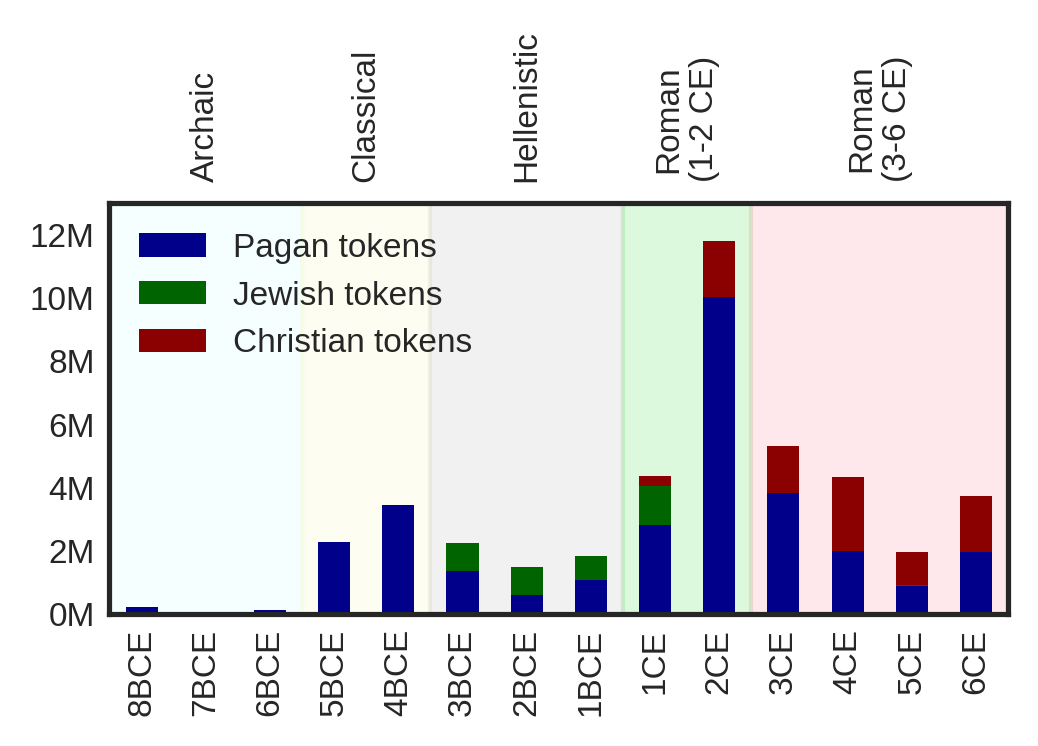

In [53]:
import matplotlib.pyplot as plt

# Create the figure and axis
fig, ax = plt.subplots(figsize=(3.5, 2.5), tight_layout=True)

# Set y-ticks and labels
ax.set_yticks(range(0, 20000000, 2000000))
ax.set_yticklabels([str(n) + "M" for n in range(0, 20, 2)])
ax.set_ylim(0, 13000000)
ax.set_xlim(-1, 14)

# Highlight periods with axvspan and annotate each
for n, (period, color) in enumerate(zip(periods_dict.keys(), periods_colors)):
    ax.axvspan(periods_dict[period]["startdate"], periods_dict[period]["enddate"], color=color, alpha=0.3)
    midpoint = (periods_dict[period]["startdate"] + periods_dict[period]["enddate"]) / 2  # calculate midpoint for label
    ax.annotate(periods_labels[n], (midpoint, ax.get_ylim()[1] * 0.95), xytext=(0, 10),
                textcoords='offset points', ha='center', va='bottom', rotation=90)

# Plot the dataframe with stacked bars and store the returned AxesSubplot
centuries_overview_df[["pagan_tokens_n", "jewish_tokens_n", "christian_tokens_n"]].plot(kind='bar', color=colors,
                                                                                        stacked=True, ax=ax)

# Set x-ticks and labels
ax.set_xticks(range(0, 14))
ax.set_xticklabels(centuries_overview_df["cent_label"])

# Set custom legend labels for the bar plot
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ["Pagan tokens", "Jewish tokens", "Christian tokens"], loc='best')

# Show plot
plt.show()


In [54]:
save_figure(fig, "centuries_overview")

# Building vocabulary data

In [55]:
def try_to_get_from_freqdict(word, word_freqs_dict):
    total_N = sum([val for val in word_freqs_dict.values()])
    try:
        count = word_freqs_dict[word]
        freq = count #/ total_N
    except:
        freq = 0
    return freq


min_freq = 5

def get_vocab(docs, min_freq=min_freq):
    words_flat = [item for sublist in docs for item in sublist]
    total_words = len(words_flat)
    wordcounts_tups = FreqDist(words_flat).most_common()
    wordfreqs_tups = [(tup[0], tup[1] / total_words) for tup in wordcounts_tups]
    return wordcounts_tups, wordfreqs_tups

wordcounts_dicts = []
wordfreqs_dicts = []


for sub in subcorpora_ids_dict.keys():
    subset = LAGT[LAGT["doc_id"].isin(subcorpora_ids_dict[sub])]
    sents = [sent for work in subset["lemmatized_sentences"] for sent in work]
    wordcounts_tups, wordfreqs_tups = get_vocab(sents)
    wordcounts_dicts.append(dict(wordcounts_tups))
    wordfreqs_dicts.append(dict(wordfreqs_tups))

In [56]:
wordcounts_df = pd.DataFrame(wordcounts_dicts).T
wordcounts_df.columns = subcorpora_ids_dict.keys()
wordcounts_df.fillna(0, inplace=True)
wordcounts_df = wordcounts_df.astype(int)
wordcounts_df.head(5)

,pagan_archaic,pagan_classical,pagan_hellenistic,pagan_roman_peak,pagan_roman_late,christian_roman_peak,christian_roman_late,jewish
εἰμί,2983,74864,31177,99272,19685,8324,5241,12319
πᾶς,1637,19928,9108,31800,15015,6883,9324,10776
ἀνήρ,1614,8550,3700,10259,4068,2053,3385,3086
αὐτός,1534,42498,25174,107013,28587,8447,9611,14221
θεός,1468,5595,2802,9629,6852,15349,20369,8856


In [57]:
wordfreqs_df = pd.DataFrame(wordfreqs_dicts).T
wordfreqs_df.columns = subcorpora_ids_dict.keys()
wordfreqs_df.head(5)

,pagan_archaic,pagan_classical,pagan_hellenistic,pagan_roman_peak,pagan_roman_late,christian_roman_peak,christian_roman_late,jewish
εἰμί,0.014988,0.036645,0.023915,0.020595,0.009990,0.009578,0.003392,0.015122
πᾶς,0.008225,0.009754,0.006987,0.006597,0.007620,0.007920,0.006035,0.013228
ἀνήρ,0.008110,0.004185,0.002838,0.002128,0.002064,0.002362,0.002191,0.003788
αὐτός,0.007708,0.020802,0.019310,0.022201,0.014508,0.009719,0.006221,0.017457
θεός,0.007376,0.002739,0.002149,0.001998,0.003477,0.017661,0.013185,0.010871


In [58]:
wordfreqs_df["freq_avg"] = wordfreqs_df.mean(axis=1)

In [59]:
religion_final = ["θεός", "Ζεύς", "εὐσεβής", 'ἱερός']
morality_final = ["ἀγαθός", "ἀρετή", "δίκαιος", "τιμή"]

In [60]:
pd.concat([wordfreqs_df.loc[religion_final], wordfreqs_df.loc[morality_final]])

,pagan_archaic,pagan_classical,pagan_hellenistic,pagan_roman_peak,pagan_roman_late,christian_roman_peak,christian_roman_late,jewish,freq_avg
θεός,0.007376,0.002739,0.002149,0.001998,0.003477,0.017661,0.013185,0.010871,0.007432
Ζεύς,0.006542,0.001317,0.000697,0.000854,0.000625,0.000521,0.000215,0.000052,0.001353
εὐσεβής,0.000060,0.000059,0.000050,0.000036,0.000037,0.000129,0.000236,0.000107,0.000089
ἱερός,0.000673,0.000541,0.000837,0.000558,0.000337,0.000280,0.000306,0.001102,0.000579
ἀγαθός,0.001296,0.004561,0.001925,0.002955,0.003574,0.003129,0.002578,0.002939,0.002870
ἀρετή,0.000548,0.001140,0.001005,0.000674,0.000978,0.001087,0.000881,0.001572,0.000986
δίκαιος,0.000407,0.001735,0.000669,0.000512,0.000934,0.001984,0.001291,0.001288,0.001102
τιμή,0.000668,0.000430,0.000476,0.000358,0.000384,0.000505,0.000500,0.000937,0.000532


In [61]:
pd.concat([wordcounts_df.loc[religion_final], wordcounts_df.loc[morality_final]])

,pagan_archaic,pagan_classical,pagan_hellenistic,pagan_roman_peak,pagan_roman_late,christian_roman_peak,christian_roman_late,jewish
θεός,1468,5595,2802,9629,6852,15349,20369,8856
Ζεύς,1302,2690,908,4116,1231,453,332,42
εὐσεβής,12,121,65,175,73,112,365,87
ἱερός,134,1105,1091,2690,665,243,472,898
ἀγαθός,258,9318,2509,14244,7043,2719,3983,2394
ἀρετή,109,2328,1310,3247,1928,945,1361,1281
δίκαιος,81,3545,872,2467,1841,1724,1995,1049
τιμή,133,878,620,1725,757,439,773,763


In [62]:
len(wordcounts_df)

504501

In [63]:
wordcounts_df[(wordcounts_df >= 5).all(axis=1)].tail(10)# # .notnull().all(axis=1).sum()

,pagan_archaic,pagan_classical,pagan_hellenistic,pagan_roman_peak,pagan_roman_late,christian_roman_peak,christian_roman_late,jewish
ἀνατείνω,5,56,64,363,37,10,21,39
βλαστάνω,5,197,129,66,9,17,25,39
ἐπῳδή,5,54,15,53,23,36,45,5
στέγω,5,48,15,135,40,24,27,12
λόγχη,5,102,66,136,25,5,12,17
ἀπαλλαγή,5,84,54,100,83,56,95,54
ἐλευθερόω,5,156,170,229,59,57,98,27
μεσημβρινός,5,18,209,323,34,6,17,16
φαιδρός,5,25,8,131,79,9,44,12
πρεσβεύω,5,179,181,333,139,54,116,55


In [64]:
filtered_df = wordcounts_df[(wordcounts_df >= 5).all(axis=1)]
len(filtered_df)
shared_vocabulary = filtered_df.index.tolist()
len(shared_vocabulary)

1929

In [65]:
filtered_df["total"] = filtered_df.sum(axis=1)
filtered_df.sort_values("total", ascending=False).head(100)

/tmp/ipykernel_3040296/1093215678.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["total"] = filtered_df.sum(axis=1)


,pagan_archaic,pagan_classical,pagan_hellenistic,pagan_roman_peak,pagan_roman_late,christian_roman_peak,christian_roman_late,jewish,total
οὗτος,1200,65447,27907,110798,54069,15609,30627,9436,315093
εἰμί,2983,74864,31177,99272,19685,8324,5241,12319,253865
αὐτός,1534,42498,25174,107013,28587,8447,9611,14221,237085
λέγω,684,31827,13158,74618,42530,21028,30146,6886,220877
γίγνομαι,734,25618,12334,55990,24038,8581,16415,6955,150665
...,...,...,...,...,...,...,...,...,...
φίλος,936,3908,1250,4509,1910,609,855,921,14898
αἰτία,46,2125,1345,5656,3115,543,1131,640,14601
ἐναντίος,41,3439,997,5437,3099,357,661,505,14536
κοινός,42,2126,2082,5484,2909,460,1019,409,14531


In [66]:
morality_mft = google_conf.get_as_dataframe(theos_data.worksheet("morality_mft"))
morality_mft

,term,translation,moral_foundation
0,ἀγαθός,"good, virtuous","['Care/Harm', 'Fairness/Cheating']"
1,εὐεργετέω,"to do good, benefit",['Care/Harm']
2,εὐεργεσία,"benefaction, good deed",['Care/Harm']
3,εὐεργέτης,benefactor,['Care/Harm']
4,ἔλεος,"pity, mercy",['Care/Harm']
5,οἰκτίρω,"to pity, show compassion",['Care/Harm']
6,ἀγάπη,"love, charity",['Care/Harm']
7,φιλάνθρωπος,"benevolent, humanitarian",['Care/Harm']
8,δίκαιος,"just, righteous",['Fairness/Cheating']
9,δικαιοσύνη,"justice, righteousness",['Fairness/Cheating']


In [67]:
morality_extension = ["δικαιοσύνη", "δικαιόω", "ἀδικέω", "ἄδικος", "σωφροσύνη", "φίλος", "ἁμαρτία", "πονηρός", "κακός", "τιμάω", "εὐεργετέω", "εὐεργεσία", "εὐεργέτης", "σπουδαῖος", "ἐπαινετός","βέλτιστος", "βελτίων", "μεγαλοψυχία", "μεγαλόψυχος", "τιμάω", "εὔνοια", "καλός", "ἀλήθεια"]
religion_extension = ["εὐχή", "θεά", "θεῖος", "εὐσέβεια", "εὐσεβέω", "εὐλογέω", "εὐλογητός", "θεοφιλής", "ἀσεβέω", "ἀσεβής", "εὐσέβεια", "θύω", "δαίμων", "δαιμόνιον", "τελετή", "θεῖος", "ἱερόν", "εὔχομαι", "ναός", "καθιερόω", "ἱερή"]

In [68]:
wordcounts_df.loc[morality_extension + religion_extension]

,pagan_archaic,pagan_classical,pagan_hellenistic,pagan_roman_peak,pagan_roman_late,christian_roman_peak,christian_roman_late,jewish
δικαιοσύνη,0,574,172,696,533,1037,1277,537
δικαιόω,1,69,44,83,42,132,117,104
ἀδικέω,29,2260,365,1443,1224,359,412,329
ἄδικος,16,755,149,555,453,329,360,293
σωφροσύνη,1,405,106,505,388,189,264,141
φίλος,936,3908,1250,4509,1910,609,855,921
ἁμαρτία,8,169,56,179,117,1602,2015,625
πονηρός,42,892,218,922,532,937,1155,599
κακός,739,5372,1386,5677,3278,1478,2145,1431
τιμάω,90,949,517,1495,885,351,672,363


In [69]:
wordfreqs_df.loc[morality_extension + religion_extension]

,pagan_archaic,pagan_classical,pagan_hellenistic,pagan_roman_peak,pagan_roman_late,christian_roman_peak,christian_roman_late,jewish,freq_avg
δικαιοσύνη,NaN,2.809647e-04,0.000132,0.000144,0.000270,0.001193,0.000827,0.000659,0.000501
δικαιόω,0.000005,3.377451e-05,0.000034,0.000017,0.000021,0.000152,0.000076,0.000128,0.000058
ἀδικέω,0.000146,1.106237e-03,0.000280,0.000299,0.000621,0.000413,0.000267,0.000404,0.000442
ἄδικος,0.000080,3.695616e-04,0.000114,0.000115,0.000230,0.000379,0.000233,0.000360,0.000235
σωφροσύνη,0.000005,1.982417e-04,0.000081,0.000105,0.000197,0.000217,0.000171,0.000173,0.000143
φίλος,0.004703,1.912910e-03,0.000959,0.000935,0.000969,0.000701,0.000553,0.001131,0.001483
ἁμαρτία,0.000040,8.272307e-05,0.000043,0.000037,0.000059,0.001843,0.001304,0.000767,0.000522
πονηρός,0.000211,4.366212e-04,0.000167,0.000191,0.000270,0.001078,0.000748,0.000735,0.000480
κακός,0.003713,2.629517e-03,0.001063,0.001178,0.001664,0.001701,0.001388,0.001757,0.001887
τιμάω,0.000452,4.645218e-04,0.000397,0.000310,0.000449,0.000404,0.000435,0.000446,0.000420


In [71]:
#google_conf.set_with_dataframe(theos_data.add_worksheet("shared_vocabulary", 1,1), filtered_df.sort_values("total", ascending=False).reset_index())

In [72]:
wordfreqs_df["freq_avg"] = wordfreqs_df.mean(axis=1)

In [73]:
#google_conf.set_with_dataframe(theos_data.add_worksheet("shared_vocabulary_freqs", 1,1), wordfreqs_df.loc[shared_vocabulary].sort_values("freq_avg", ascending=False).reset_index())

In [74]:
vocabulary_mostcommon2000 = []
for key in subcorpora_ids_dict.keys():
    vocabulary_mostcommon2000.extend(list(wordcounts_df.sort_values(key, ascending=False).index[:2000]))

In [75]:
len(list(set(vocabulary_mostcommon2000)))

5171

In [76]:
len(list(set(vocabulary_mostcommon2000 + shared_vocabulary)))

5394

In [77]:
vocabulary_balanced = list(set(vocabulary_mostcommon2000 + shared_vocabulary))

In [78]:
wordfreqs_df.loc[vocabulary_balanced].head(100)

,pagan_archaic,pagan_classical,pagan_hellenistic,pagan_roman_peak,pagan_roman_late,christian_roman_peak,christian_roman_late,jewish,freq_avg
συνοικέω,0.000015,9.055484e-05,0.000064,0.000054,0.000044,0.000018,2.912831e-05,0.000092,0.000051
πορεία,0.000025,9.349175e-05,0.000212,0.000064,0.000066,0.000085,1.158659e-04,0.000095,0.000095
Φορμίων,NaN,6.901747e-05,0.000007,0.000007,0.000004,0.000001,6.472957e-07,NaN,0.000015
σεισμός,NaN,5.139599e-05,0.000076,0.000068,0.000098,0.000046,5.243095e-05,0.000045,0.000062
Πτολεμαίς,NaN,9.789712e-07,0.000015,0.000003,0.000001,NaN,2.589183e-06,0.000103,0.000021
...,...,...,...,...,...,...,...,...,...
βαρύς,0.000402,3.783724e-04,0.000324,0.000238,0.000255,0.000084,9.774165e-05,0.000226,0.000251
κῶνος,NaN,2.496377e-05,0.001009,0.000032,0.000024,0.000001,1.294591e-06,NaN,0.000182
πῆχυς,0.000050,7.489130e-05,0.000151,0.000170,0.000074,0.000035,3.171749e-05,0.000426,0.000126
κατακόπτω,NaN,2.545325e-05,0.000084,0.000027,0.000019,0.000006,1.100403e-05,0.000016,0.000027


In [79]:
with open("../data/vocabulary_balanced.pickle", "wb") as f:
    pickle.dump(vocabulary_balanced, f)

In [80]:
wordcounts_df.head(5)

,pagan_archaic,pagan_classical,pagan_hellenistic,pagan_roman_peak,pagan_roman_late,christian_roman_peak,christian_roman_late,jewish
εἰμί,2983,74864,31177,99272,19685,8324,5241,12319
πᾶς,1637,19928,9108,31800,15015,6883,9324,10776
ἀνήρ,1614,8550,3700,10259,4068,2053,3385,3086
αὐτός,1534,42498,25174,107013,28587,8447,9611,14221
θεός,1468,5595,2802,9629,6852,15349,20369,8856


In [81]:
for key in subcorpora_ids_dict.keys():
    cover_n = wordcounts_df.loc[vocabulary_balanced][key].sum()
    total_n = wordcounts_df[key].sum()
    proportion = cover_n / total_n
    print(key, cover_n, total_n, proportion)

pagan_archaic 164094 199023 0.824497671123438
pagan_classical 1728183 2042961 0.8459207003951618
pagan_hellenistic 1038752 1303655 0.7967997668094703
pagan_roman_peak 3712611 4820083 0.7702379813791588
pagan_roman_late 1531653 1970470 0.777303384471725
christian_roman_peak 691142 869103 0.7952360076998929
christian_roman_late 1155868 1544889 0.7481883811717217
jewish 654761 814648 0.8037348646286494


In [84]:
#wordcounts_df[(wordcounts_df.loc[vocabulary_balanced]) & ]

In [85]:
(wordcounts_df > 0).all(axis=1).sum()

5198

In [86]:
filtered_df = wordcounts_df.loc[vocabulary_balanced]
len(filtered_df[(filtered_df > 0).all(axis=1)])

3159

In [87]:
filtered_df = wordcounts_df.loc[vocabulary_balanced]
len(filtered_df[(filtered_df >= 5).all(axis=1)])

1929

In [88]:
filtered_df = wordcounts_df.loc[vocabulary_balanced]
filtered_df = filtered_df[(filtered_df >= 10).all(axis=1)]
len(filtered_df)

1220

In [89]:
shared_vocabulary = list(filtered_df.index)

In [90]:
with open("../data/shared_vocabulary.pickle", "wb") as f:
    pickle.dump(shared_vocabulary, f)

In [91]:
wordcounts_df.to_json("../data/large_data/wordcounts_df.json")
wordfreqs_df.to_json("../data/large_data/wordfreqs_df.json")

In [92]:
wordcounts_df = pd.read_json("../data/large_data/wordcounts_df.json")

In [93]:
LAGT.to_parquet("../data/large_data/LAGT_theos.parquet")